In [78]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
df=pd.read_csv('C:\\Users\\Ankesh\\Desktop\\DS\\FILES\\titanic_train.csv')

In [3]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


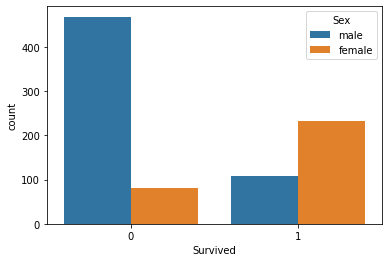

In [4]:
sns.countplot(data=df,hue='Sex',x='Survived')

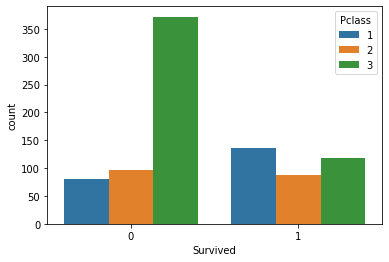

In [5]:
sns.countplot(data=df,hue='Pclass',x='Survived')

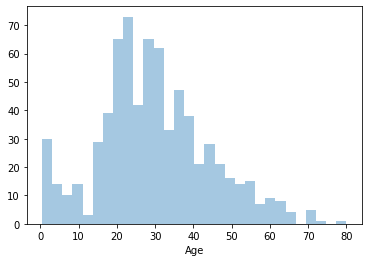

In [6]:
sns.distplot(df['Age'].dropna(),bins=30,kde=False)

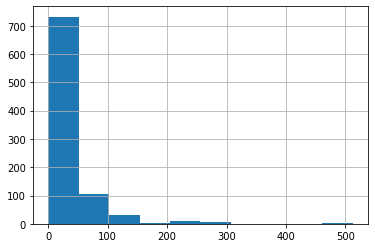

In [7]:
df['Fare'].hist()

In [9]:
import cufflinks as cf
cf.go_offline()
df['Fare'].iplot(kind='hist')


ModuleNotFoundError: No module named 'cufflinks'

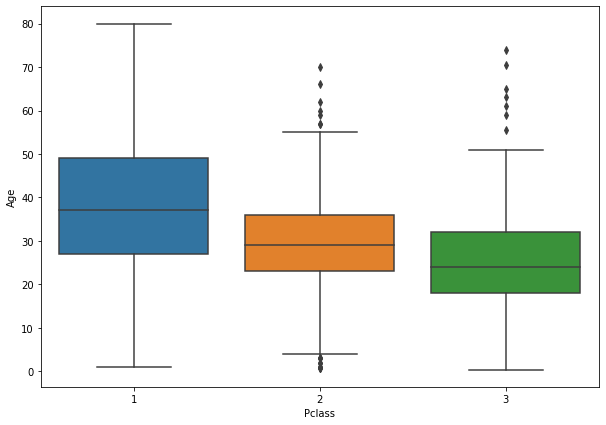

In [10]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Pclass',y='Age',data=df)


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


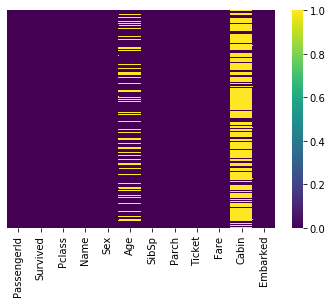

In [12]:
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap='viridis')

In [13]:
def impute_age(cols):
    age=cols[0]
    Pclass=cols[1]
    if pd.isnull(age):
        if Pclass==1:
            return 37
        elif Pclass==2:
            return 29
        else:
            return 24
    else:
        return age

In [14]:
df['Age']=df[['Age','Pclass']].apply(impute_age,axis=1)

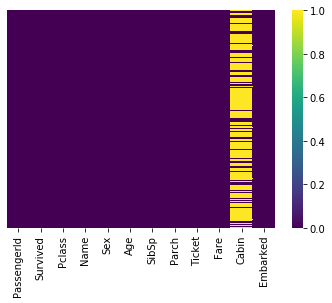

In [15]:
#df[df['Pclass']==3]['Age'].mean()
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap='viridis')

In [16]:
df.drop('Cabin',axis=1,inplace=True)

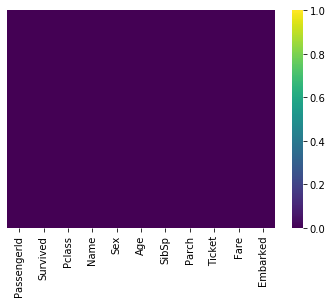

In [17]:
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap='viridis')

In [18]:
df.dropna(inplace=True)

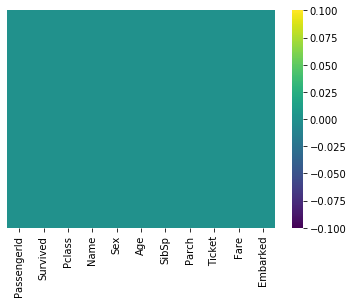

In [19]:
sns.heatmap(df.isnull(),cbar=True,yticklabels=False,cmap='viridis')

In [20]:
#Categorical features
sex=pd.get_dummies(df['Sex'],drop_first=True)
sex.head()

,male
0,1
1,0
2,0
3,0
4,1


In [21]:
embark=pd.get_dummies(df['Embarked'],drop_first=True)
embark.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [22]:
df=pd.concat([df,sex,embark],axis=1)

In [23]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,1,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,0,1


In [24]:
df.drop(['Sex','Embarked','Name','Ticket','PassengerId'],axis=1,inplace=True)

In [25]:
df.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [26]:
x=df.drop('Survived',axis=1)
y=df['Survived']

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=101)

In [105]:
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)
rfe = rfe.fit(x, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)


Optimization terminated successfully.
         Current function value: 0.496272
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.254     
Dependent Variable: Survived         AIC:              898.3724  
Date:               2020-05-06 15:46 BIC:              936.6932  
No. Observations:   889              Log-Likelihood:   -441.19   
Df Model:           7                LL-Null:          -591.41   
Df Residuals:       881              LLR p-value:      4.8599e-61
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
-------------------------------------------------------------------
          Coef.    Std.Err.      z       P>|z|     [0.025    0.975]
-------------------------------------------------------------------
Pclass    0.0317     0.0846     0.3749   0.7077   -0.1341    0.1975
Age       0.0053     0.0057     0.9211   0.3570   -0.0060 

In [106]:
from sklearn.feature_selection import RFE
rfe = RFE(logmodel, 20)
rfe = rfe.fit(x, y.values.ravel())
print(rfe.support_)
print(rfe.ranking_)

def roc(y_test,y_prob):
    from sklearn.metrics import roc_auc_score
    from sklearn.metrics import roc_curve
    logit_roc_auc = roc_auc_score(y_test, y_prob)
    fpr, tpr, thresholds = roc_curve(y_test, y_prob)
    plt.figure()
    plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic')
    plt.legend(loc="lower right")
    #plt.savefig('Log_ROC')
    plt.show()
    
print('''The receiver operating characteristic (ROC) curve is another common
      tool used with binary classifiers. The dotted line represents the ROC curve 
      of a purely random classifier; a good classifier stays as far 
      away from that line as possible (toward the top-left corner).''')

[ True  True  True  True  True  True  True  True]
[1 1 1 1 1 1 1 1]
The receiver operating characteristic (ROC) curve is another common
      tool used with binary classifiers. The dotted line represents the ROC curve 
      of a purely random classifier; a good classifier stays as far 
      away from that line as possible (toward the top-left corner).


              precision    recall  f1-score   support

           0       0.80      0.91      0.85       163
           1       0.82      0.65      0.73       104

    accuracy                           0.81       267
   macro avg       0.81      0.78      0.79       267
weighted avg       0.81      0.81      0.80       267

[[148  15]
 [ 36  68]]


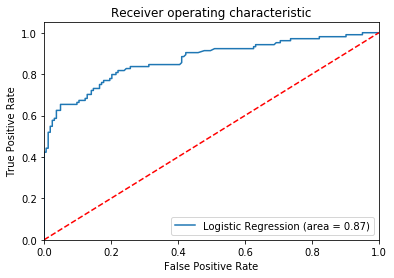

In [121]:
from sklearn.linear_model import LogisticRegression
logmodel=LogisticRegression(solver='liblinear')#LogisticRegression(solver = 'lbfgs') multi class
#LogisticRegression(multi_class='multinomial', solver='newton-cg')
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
#y_pred=np.where(y_prob>0.5,1,0)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
y_prob=logmodel.predict_proba(x_test)[:,1]##logistic regression returns a probability
roc(y_test,y_prob)

In [111]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
logmodel=LinearDiscriminantAnalysis()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
y_prob=logmodel.predict_proba(x_test)#[:,1]
y_prob.shape
#roc(y_test,y_prob)

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.82      0.67      0.74       104

    accuracy                           0.82       267
   macro avg       0.82      0.79      0.80       267
weighted avg       0.82      0.82      0.81       267

[[148  15]
 [ 34  70]]


(267, 2)

              precision    recall  f1-score   support

           0       0.81      0.93      0.87       163
           1       0.85      0.66      0.75       104

    accuracy                           0.82       267
   macro avg       0.83      0.79      0.81       267
weighted avg       0.83      0.82      0.82       267

[[151  12]
 [ 35  69]]


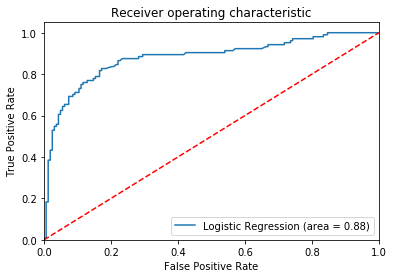

In [109]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
logmodel=QuadraticDiscriminantAnalysis()
logmodel.fit(x_train,y_train)
predictions=logmodel.predict(x_test)
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
y_prob=logmodel.predict_proba(x_test)[:,1]
roc(y_test,y_prob)